# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q="

In [4]:
count = 0
city_name = []
clouds = []
latitude = []
max_temp = []
long = []
country = []
humidity = []
wind_speed = []
date = []

# Loop through each city
for city in cities:
    city_url = query_url + city
    try:
        response = requests.get(city_url).json()
#pprint(response)
        count+= 1       
        city_name.append(response['name'])
        clouds.append(response['clouds']['all'])
        latitude.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        long.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])

        print(f"{city} found! this is city number {count}")
        
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("Missing Information, skipping this city")
        pass

ushuaia found! this is city number 1
norman wells found! this is city number 2
chumikan found! this is city number 3
rikitea found! this is city number 4
tuktoyaktuk found! this is city number 5
along found! this is city number 6
tiksi found! this is city number 7
kodiak found! this is city number 8
najran found! this is city number 9
meridian found! this is city number 10
bethel found! this is city number 11
bluff found! this is city number 12
albany found! this is city number 13
butaritari found! this is city number 14
castro found! this is city number 15
banes found! this is city number 16
kapaa found! this is city number 17
hobart found! this is city number 18
chuy found! this is city number 19
chokurdakh found! this is city number 20
takaka found! this is city number 21
mahebourg found! this is city number 22
nouadhibou found! this is city number 23
sao miguel do iguacu found! this is city number 24
baker city found! this is city number 25
saint-philippe found! this is city number

saint anthony found! this is city number 208
yakeshi found! this is city number 209
vanavara found! this is city number 210
kaitangata found! this is city number 211
khasan found! this is city number 212
kalemie found! this is city number 213
sao filipe found! this is city number 214
tuatapere found! this is city number 215
nyurba found! this is city number 216
nieuwpoort found! this is city number 217
uyskoye found! this is city number 218
the valley found! this is city number 219
Missing Information, skipping this city
huarmey found! this is city number 221
kalininsk found! this is city number 222
kitui found! this is city number 223
whitehorse found! this is city number 224
yukhnov found! this is city number 225
maceio found! this is city number 226
stoughton found! this is city number 227
gunnedah found! this is city number 228
lorengau found! this is city number 229
kieta found! this is city number 230
Missing Information, skipping this city
camacha found! this is city number 232


bulgan found! this is city number 412
poplar bluff found! this is city number 413
pokhara found! this is city number 414
narsaq found! this is city number 415
whitianga found! this is city number 416
kamaishi found! this is city number 417
santa marta de tormes found! this is city number 418
kencong found! this is city number 419
axim found! this is city number 420
esperance found! this is city number 421
okha found! this is city number 422
saint-augustin found! this is city number 423
Missing Information, skipping this city
adre found! this is city number 425
beloha found! this is city number 426
high level found! this is city number 427
porto walter found! this is city number 428
marfino found! this is city number 429
tabora found! this is city number 430
cairns found! this is city number 431
mastung found! this is city number 432
la asuncion found! this is city number 433
palmares do sul found! this is city number 434
oistins found! this is city number 435
tumut found! this is city 

savalou found! this is city number 617
charcas found! this is city number 618
tranas found! this is city number 619


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_df = pd.DataFrame({
    'City': city_name,
    'Cloudiness': clouds,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': latitude,
    'Lng': long,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed
})
city_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,7,AR,1586391288,32,-54.80,-68.30,293.15,3.60
1,Norman Wells,90,CA,1586391289,46,65.28,-126.83,272.15,7.70
2,Chumikan,25,RU,1586391289,78,54.72,135.31,276.03,4.09
3,Rikitea,80,PF,1586391289,80,-23.12,-134.97,297.94,4.23
4,Tuktoyaktuk,20,CA,1586391289,72,69.45,-133.04,261.15,4.60
...,...,...,...,...,...,...,...,...,...
571,Roald,94,NO,1586391496,93,62.58,6.13,275.93,6.70
572,Wanning,93,CN,1586391497,89,18.80,110.40,297.19,4.71
573,Savalou,75,BJ,1586391497,81,7.93,1.98,298.08,3.16
574,Charcas,13,MX,1586391497,7,23.13,-101.12,300.73,3.98


In [24]:
city_weather_df.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

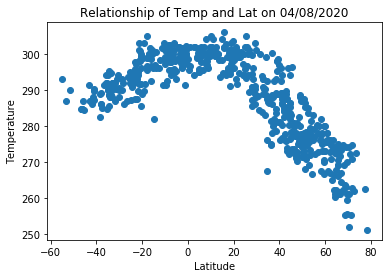

In [6]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Relationship of Temp and Lat on 04/08/2020')
plt.show()

#### Latitude vs. Humidity Plot

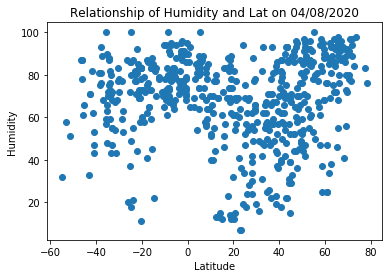

In [7]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Relationship of Humidity and Lat on 04/08/2020')
plt.show()

#### Latitude vs. Cloudiness Plot

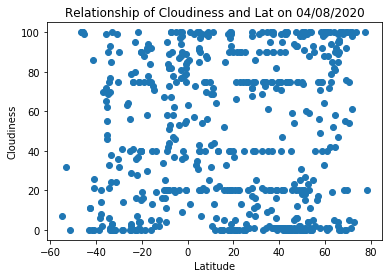

In [8]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Relationship of Cloudiness and Lat on 04/08/2020')
plt.show()

#### Latitude vs. Wind Speed Plot

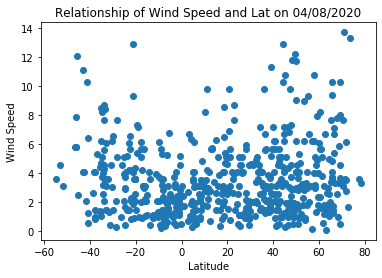

In [9]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Relationship of Wind Speed and Lat on 04/08/2020')
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots 
 
def linear_regression(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
#Northern Hemisphere (greater than or equal to 0 degrees latitude):
northern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] >= 0)]
northern_hemi_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Norman Wells,90,CA,1586391289,46,65.28,-126.83,272.15,7.70
2,Chumikan,25,RU,1586391289,78,54.72,135.31,276.03,4.09
4,Tuktoyaktuk,20,CA,1586391289,72,69.45,-133.04,261.15,4.60
5,Along,72,IN,1586391290,56,28.17,94.77,290.89,1.62
6,Tiksi,61,RU,1586391290,94,71.69,128.87,262.71,2.80
...,...,...,...,...,...,...,...,...,...
571,Roald,94,NO,1586391496,93,62.58,6.13,275.93,6.70
572,Wanning,93,CN,1586391497,89,18.80,110.40,297.19,4.71
573,Savalou,75,BJ,1586391497,81,7.93,1.98,298.08,3.16
574,Charcas,13,MX,1586391497,7,23.13,-101.12,300.73,3.98


In [12]:
#and Southern Hemisphere (less than 0 degrees latitude):
southern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] <= 0)]
southern_hemi_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,7,AR,1586391288,32,-54.80,-68.30,293.15,3.60
3,Rikitea,80,PF,1586391289,80,-23.12,-134.97,297.94,4.23
11,Bluff,100,NZ,1586391292,87,-46.60,168.33,284.82,5.81
14,Castro,0,BR,1586391293,49,-24.79,-50.01,287.38,1.68
17,Hobart,11,AU,1586391293,71,-42.88,147.33,287.04,4.10
...,...,...,...,...,...,...,...,...,...
557,Kirakira,67,SB,1586391491,65,-10.45,161.92,303.06,1.34
558,Tautira,92,PF,1586391491,62,-17.73,-149.15,305.15,5.70
559,Vao,36,NC,1586391491,71,-22.67,167.48,297.29,6.58
560,Mendoza,3,AR,1586391460,55,-32.89,-68.83,292.15,1.50


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

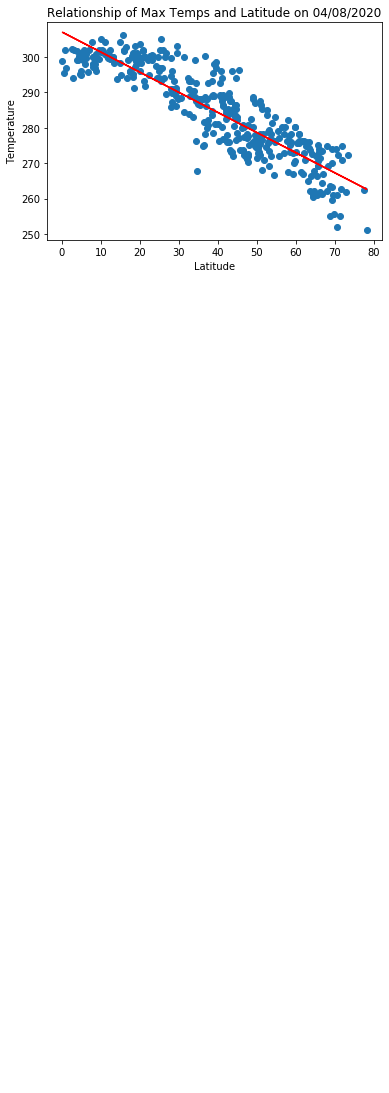

In [13]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Temperature"
title = "Relationship of Max Temps and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

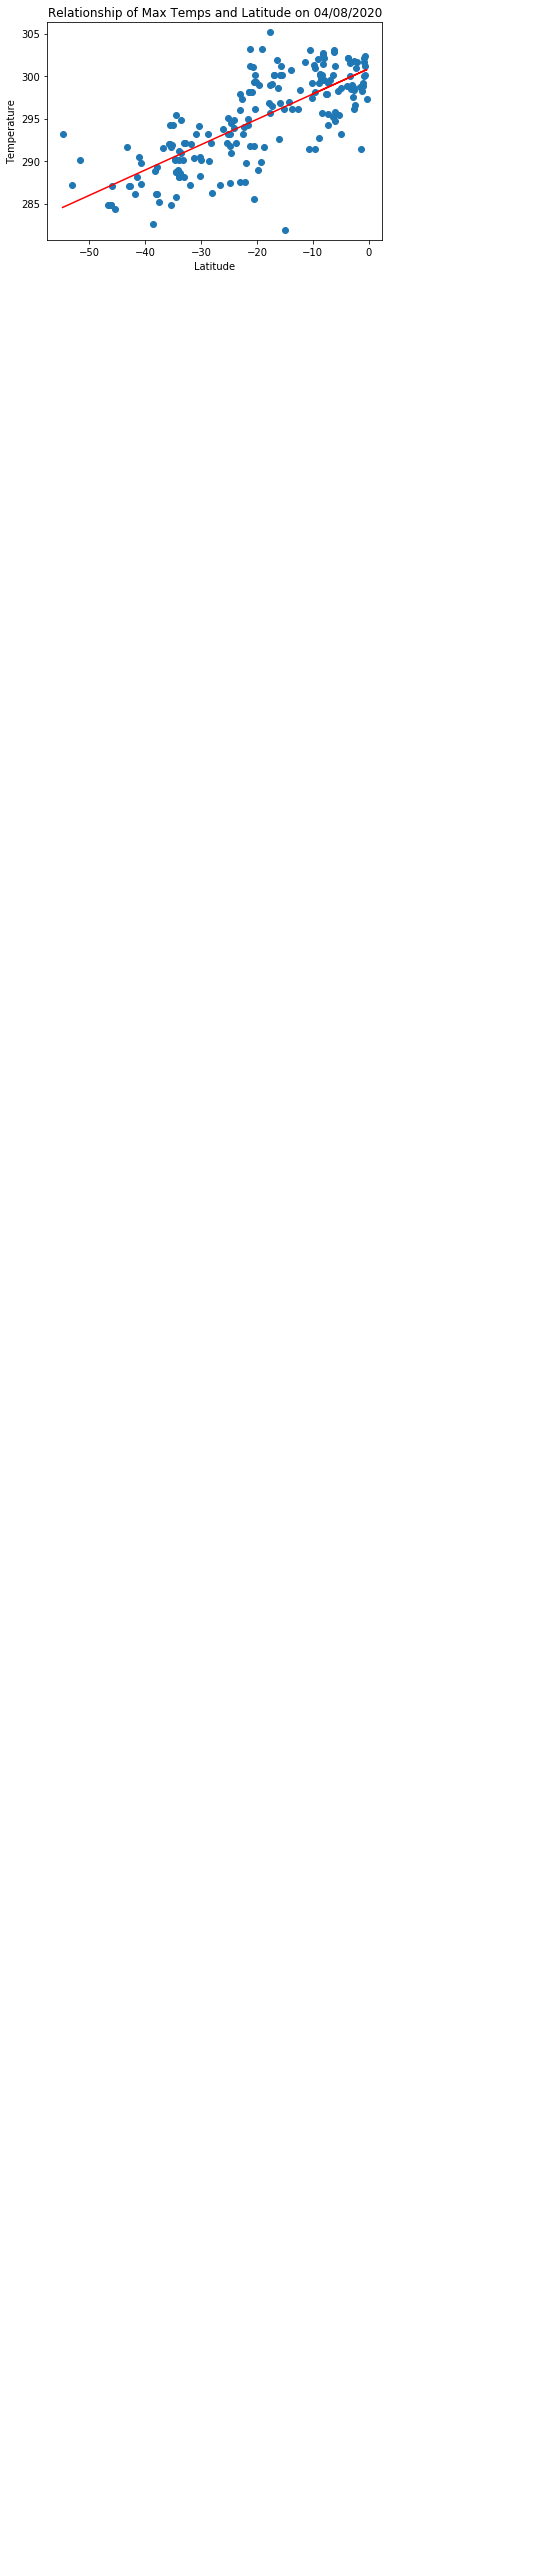

In [14]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Temperature"
title = "Relationship of Max Temps and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

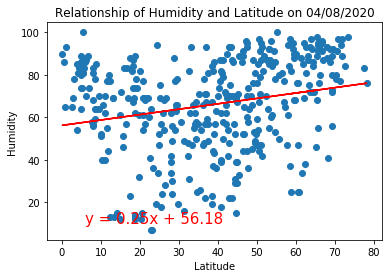

In [15]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
title = "Relationship of Humidity and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

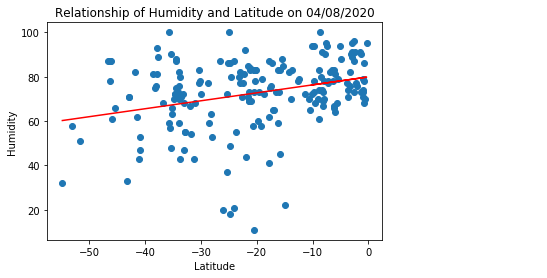

In [16]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
title = "Relationship of Humidity and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

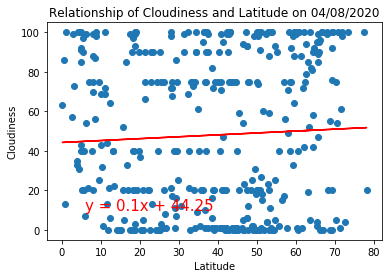

In [17]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
title = "Relationship of Cloudiness and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

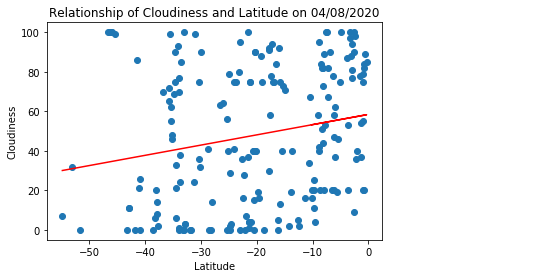

In [18]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
title = "Relationship of Cloudiness and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

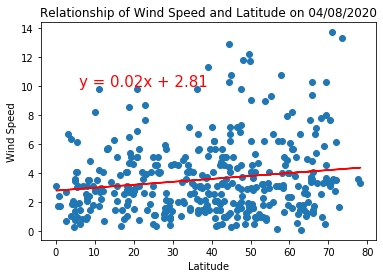

In [19]:
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
title = "Relationship of Wind Speed and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

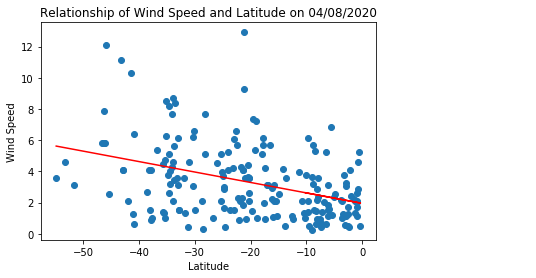

In [20]:
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
title = "Relationship of Wind Speed and Latitude on 04/08/2020"
linear_regression(x_axis, y_axis, x_label, y_label, title)